In [93]:
# import important library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
data= pd.read_csv('train_LZdllcl.csv')

In [95]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [96]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [97]:
data.shape

(54808, 14)

In [98]:
data.isna().sum()/len(data)

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [99]:
data[data['education'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0


In [100]:
# I assumed that null value on previous year rating means new employee, so I decided to fill with 0
data['previous_year_rating'] = data['previous_year_rating'].fillna(0)

In [101]:
data.isna().sum()/len(data)

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [102]:
pd.crosstab(data['education'], data['department'])

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
education,,,,,,,,,
Bachelor's,3978,1895,1525,814,7781,4393,542,11099,4642
Below Secondary,0,106,128,65,176,129,0,0,201
Master's & above,1037,499,733,156,3165,2544,429,4166,2196


from the data above  we can see that all department's employee education is dominated by Bachelor degree, so i will fill the null in education columns with bachelor

In [103]:
data[data['education'].isna()]['department'].value_counts()

Sales & Marketing    1575
Analytics             337
Operations            226
Technology             99
Procurement            72
Finance                36
HR                     32
R&D                    28
Legal                   4
Name: department, dtype: int64

In [104]:
data['education'] = data['education'].fillna("Bachelor's")
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [105]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


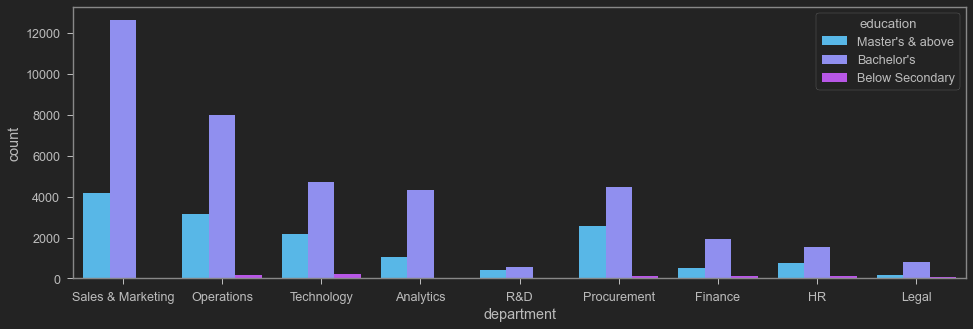

In [106]:
plt.figure(figsize= (16,5))
sns.countplot(data['department'], palette= 'cool', hue= data['education'])
plt.show()

##### Sales & Marketing department has most employee with bachelor degree education

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

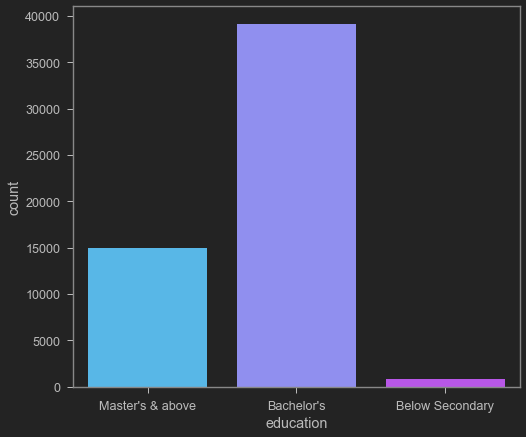

In [107]:
sns.countplot(data['education'], palette= 'cool')

##### most of employees have bachelor degree

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

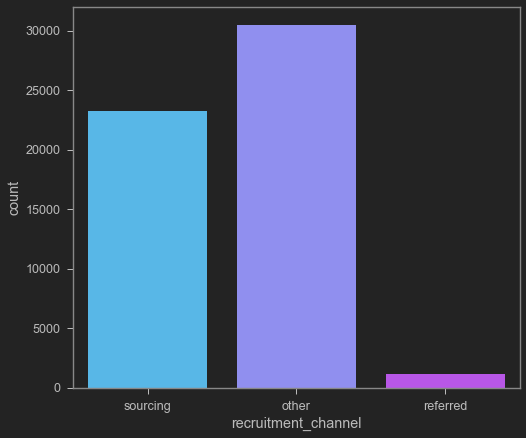

In [108]:
sns.countplot(data['recruitment_channel'], palette= 'cool')

##### most of the employee recruited by other and sourcing methods

In [109]:
sorted(data['region'].unique())

['region_1',
 'region_10',
 'region_11',
 'region_12',
 'region_13',
 'region_14',
 'region_15',
 'region_16',
 'region_17',
 'region_18',
 'region_19',
 'region_2',
 'region_20',
 'region_21',
 'region_22',
 'region_23',
 'region_24',
 'region_25',
 'region_26',
 'region_27',
 'region_28',
 'region_29',
 'region_3',
 'region_30',
 'region_31',
 'region_32',
 'region_33',
 'region_34',
 'region_4',
 'region_5',
 'region_6',
 'region_7',
 'region_8',
 'region_9']

In [110]:
data['region'] = data['region'].apply(lambda x: x.split('_')[1])
data['region'] = data['region'].astype('int')

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

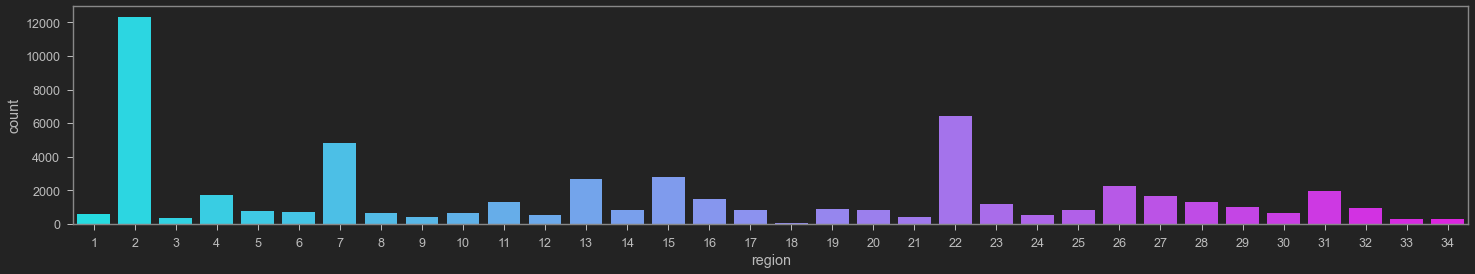

In [111]:
plt.figure(figsize=(25,4))
sns.countplot(data['region'], palette= 'cool', order= sorted(data['region'].unique()))

##### the employee mostly work in region 2

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

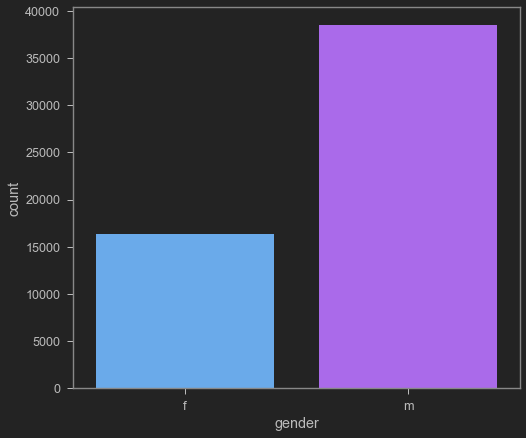

In [112]:
sns.countplot(data['gender'], palette= 'cool')

##### the employee is dominated by male gender

In [113]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [114]:
# Average age, length of service, and training score from each deparment
data.groupby('department').mean()[['age', 'length_of_service', 'avg_training_score']]

,age,length_of_service,avg_training_score
department,,,
Analytics,32.431241,4.932735,84.602952
Finance,32.058754,4.819401,60.222003
HR,34.385856,5.683623,50.018197
Legal,33.832531,4.599615,59.868142
Operations,36.073669,6.416020,60.226648
Procurement,35.899972,6.331045,70.122443
R&D,32.842843,4.554555,84.596597
Sales & Marketing,34.860629,5.912292,50.261698
Technology,34.867190,5.914822,79.928692


In [115]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [116]:
data.groupby('department').sum()[['KPIs_met >80%', 'awards_won?']]

,KPIs_met >80%,awards_won?
department,,
Analytics,2163,130
Finance,1052,70
HR,808,45
Legal,347,25
Operations,4888,262
Procurement,2695,171
R&D,416,21
Sales & Marketing,4464,361
Technology,2458,185


<AxesSubplot:xlabel='department'>

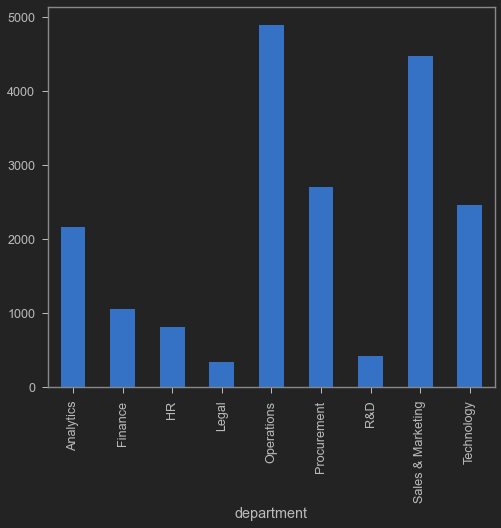

In [117]:
# Operations and Sales& Marketing deparment have most achieved KPI
data.groupby('department').sum()['KPIs_met >80%'].plot(kind='bar')

In [118]:
data.groupby('department').sum()['KPIs_met >80%']/len(data) * 100

department
Analytics            3.946504
Finance              1.919428
HR                   1.474237
Legal                0.633119
Operations           8.918406
Procurement          4.917165
R&D                  0.759013
Sales & Marketing    8.144796
Technology           4.484747
Name: KPIs_met >80%, dtype: float64

<AxesSubplot:xlabel='department'>

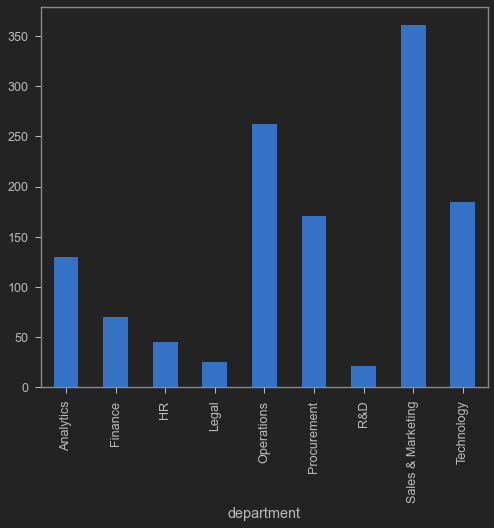

In [119]:
# Sales & Marketing department win highest award than other departments
data.groupby('department').sum()['awards_won?'].plot(kind='bar')

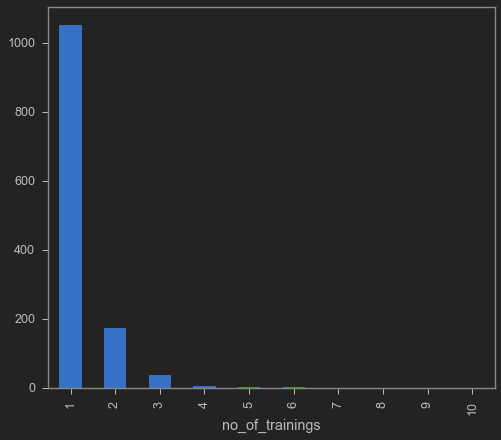

<AxesSubplot:xlabel='no_of_trainings'>

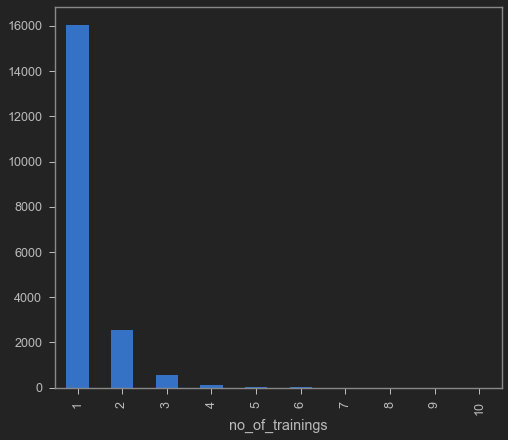

In [120]:
# from here we can see that increased training number doesn't mean better work performance
data.groupby('no_of_trainings').sum()['awards_won?'].plot(kind='bar')
plt.show()

data.groupby('no_of_trainings').sum()['KPIs_met >80%'].plot(kind='bar')

In [121]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [122]:
data.to_csv('HR_clean.csv', index=False)

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

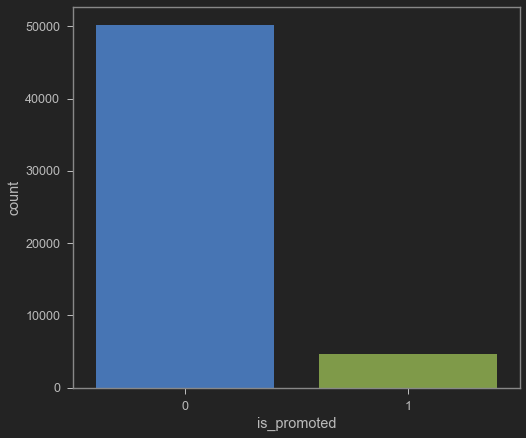

In [123]:
sns.countplot(x= data['is_promoted'])

In [125]:
# the data is imbalanced, so we need to resample the data for machine learning training
promoted = data[data['is_promoted']== 1]
not_promoted = data[data['is_promoted']== 0]

print(promoted.shape)
print(not_promoted.shape)

(4668, 14)
(50140, 14)


In [127]:
promoted = promoted.sample(50140, replace=True)
promoted.shape

(50140, 14)

In [128]:
data = pd.concat([promoted,not_promoted])
data.shape

(100280, 14)

In [129]:
x = data.drop(['employee_id', 'is_promoted'], axis=1)
y = data['is_promoted']

In [130]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [131]:
cat = x.select_dtypes('object').columns

le = LabelEncoder()
for col in cat:
    x[col] = le.fit_transform(x[col]) 

In [132]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
35771,5,2,2,1,2,1,41,3.0,11,0,0,83
53558,1,22,0,1,0,1,29,5.0,2,1,0,58
10886,4,13,2,1,0,1,45,3.0,14,1,0,53
974,0,22,0,1,0,1,28,0.0,1,1,0,86
40736,4,2,2,1,0,2,51,3.0,6,1,0,63


In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=212)

In [134]:
scaler= MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [135]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('XGBClassifier', XGBClassifier()))

In [136]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('\n')

LogisticRegression
Confusion Matrix:
 [[7126 2965]
 [2554 7411]]
Accuracy: 0.7248205025927403


KNeighborsClassifier
Confusion Matrix:
 [[8389 1702]
 [  37 9928]]
Accuracy: 0.9132927802153968


DecisionTreeClassifier
Confusion Matrix:
 [[9399  692]
 [   0 9965]]
Accuracy: 0.9654966094934184


SVC
Confusion Matrix:
 [[6572 3519]
 [1172 8793]]
Accuracy: 0.7661049062624651


KNeighborsClassifier
Confusion Matrix:
 [[8389 1702]
 [  37 9928]]
Accuracy: 0.9132927802153968


GaussianNB
Confusion Matrix:
 [[8627 1464]
 [5297 4668]]
Accuracy: 0.6628938970881532


XGBClassifier
[08:54:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\62812\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Confusion Matrix:
 [[8203 1888]
 [ 370 9595]]
Accuracy: 0.8874152373354607




from model above, we can see that DecisionTreeClassifier gain best accuracy

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [139]:
model = Sequential()
model.add(Dense(12, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation= 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer= 'adam')

In [140]:
stop = EarlyStopping(mode='min', patience=10)

In [141]:
model.fit(x=x_train, y= y_train, epochs= 600, batch_size= 16, validation_data=(x_test, y_test), verbose=0, callbacks=[stop])

<AxesSubplot:>

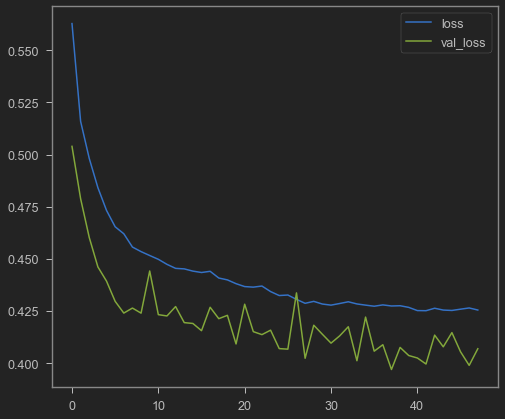

In [142]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [143]:
from sklearn.metrics import classification_report

In [144]:
predict_x=model.predict(x_test) 
predictions=np.argmax(predict_x,axis=1)

In [145]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     10091
           1       0.00      0.00      0.00      9965

    accuracy                           0.50     20056
   macro avg       0.25      0.50      0.33     20056
weighted avg       0.25      0.50      0.34     20056



C:\Users\62812\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\62812\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\62812\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
print(confusion_matrix(y_test,predictions))

[[10091     0]
 [ 9965     0]]


In [147]:
print(accuracy_score(y_test, predictions))

0.5031412046270443


In [72]:
model.save('promotion_candidate_model.h5')

In [148]:
test= pd.read_csv('test_2umaH9m.csv')

In [149]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [150]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [151]:
test['education'] = test['education'].fillna("Bachelor's")
test['previous_year_rating'] = test['previous_year_rating'].fillna(0)

In [152]:
test['region'] = test['region'].apply(lambda x: x.split('_')[1])

In [153]:
test['region']= test['region'].astype('int')

In [154]:
for col in cat:
    test[col] = le.fit_transform(test[col])

In [155]:
submission = pd.DataFrame(test['employee_id'])
submission

,employee_id
0,8724
1,74430
2,72255
3,38562
4,64486
...,...
23485,53478
23486,25600
23487,45409
23488,1186


In [156]:
test = scaler.transform(test.drop('employee_id', axis=1))
test

array([[1.        , 0.75757576, 0.        , ..., 1.        , 0.        ,
        0.63333333],
       [0.25      , 0.09090909, 0.        , ..., 0.        , 0.        ,
        0.2       ],
       [0.875     , 0.36363636, 0.        , ..., 0.        , 0.        ,
        0.13333333],
       ...,
       [0.25      , 0.45454545, 0.        , ..., 0.        , 0.        ,
        0.18333333],
       [0.625     , 0.90909091, 0.        , ..., 0.        , 0.        ,
        0.51666667],
       [1.        , 0.48484848, 1.        , ..., 1.        , 0.        ,
        0.83333333]])

In [162]:
prediction = models[2][1].predict(test)

In [163]:
prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [164]:
pred = models[6][1].predict(test)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [165]:
test= pd.read_csv('test_2umaH9m.csv')

In [166]:
test1 = test[['employee_id']]
test2 = test[['employee_id']]

In [167]:
test1['is_promoted'] = prediction
test1

<ipython-input-167-b4e636bbe76f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['is_promoted'] = prediction


,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [168]:
test2['is_promoted'] = pred
test2

<ipython-input-168-12be8944cca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['is_promoted'] = pred


,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [169]:
test2['is_promoted'].value_counts()

0    18079
1     5411
Name: is_promoted, dtype: int64

In [171]:
test1['is_promoted'].value_counts()

0    21160
1     2330
Name: is_promoted, dtype: int64

In [170]:
test2.to_csv('submission.csv', index=False)

In [172]:
test1.to_csv('submission2.csv', index=False)